In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from cz.io import Data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [2]:
data = Data() # Load the data

In [3]:
data.data.date.unique().shape[0] == data.data.shape[0] # Check if there is multiple datapoint with same time

True

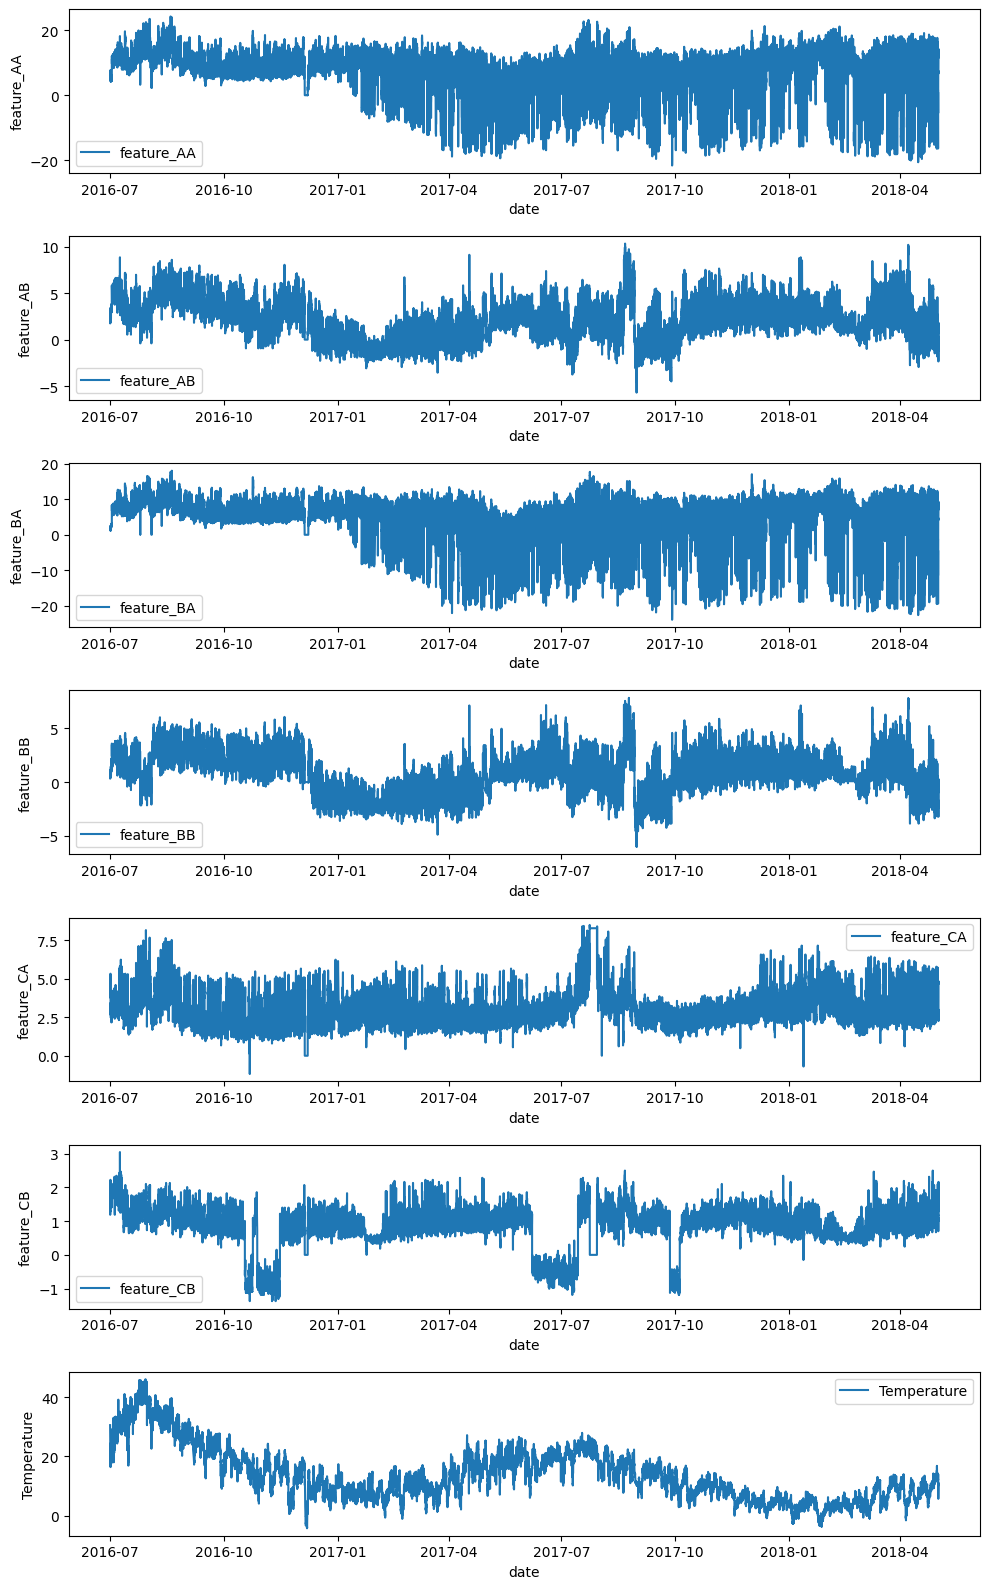

In [4]:
var_list = ["feature_AA","feature_AB","feature_BA","feature_BB","feature_CA","feature_CB","Temperature"]

fig, ax = plt.subplots(len(var_list),1 , figsize= (10, 16))
for i, var in enumerate(var_list):
    sns.lineplot(x = data.data.date, y=data.data[var], ax =ax[i], label = var)
plt.tight_layout()
# plt.savefig("images/var.png")
plt.show()

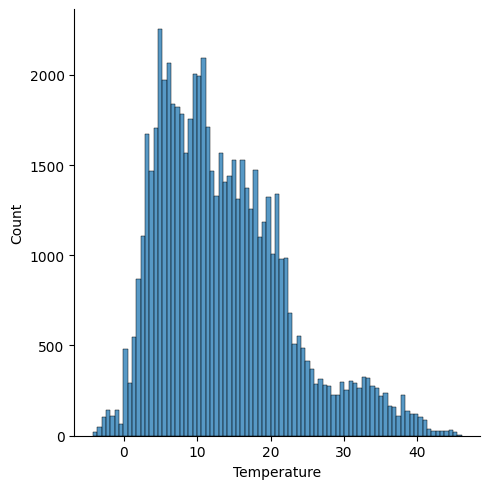

In [5]:
sns.displot(data.data.Temperature)
plt.savefig("images/temperature_distribution.png")
plt.show()

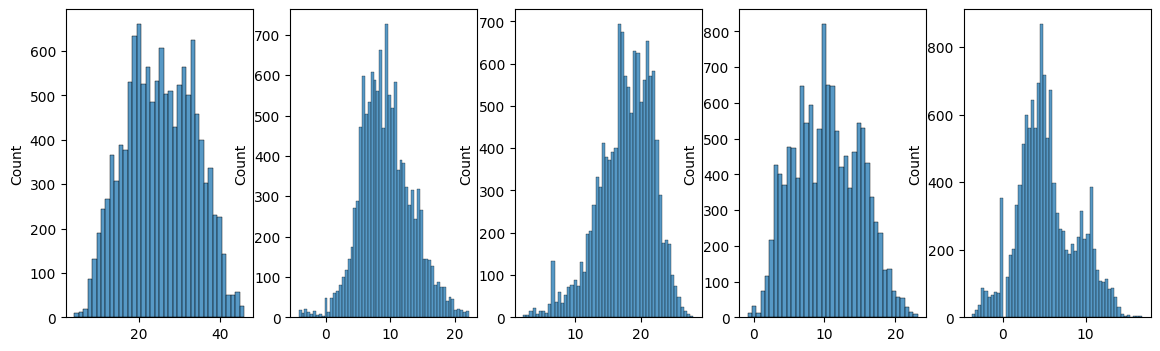

In [6]:
# Let us check for the distribution shift in the data

y = data.data.Temperature.values

n_split = 5
y_list = np.split(y, n_split)

fig, ax = plt.subplots(1, n_split, figsize=(14,4))
for s in range(n_split):
    sns.histplot(y_list[s], ax=ax[s])

plt.savefig("images/temperature_distribution_time.png")
plt.show()

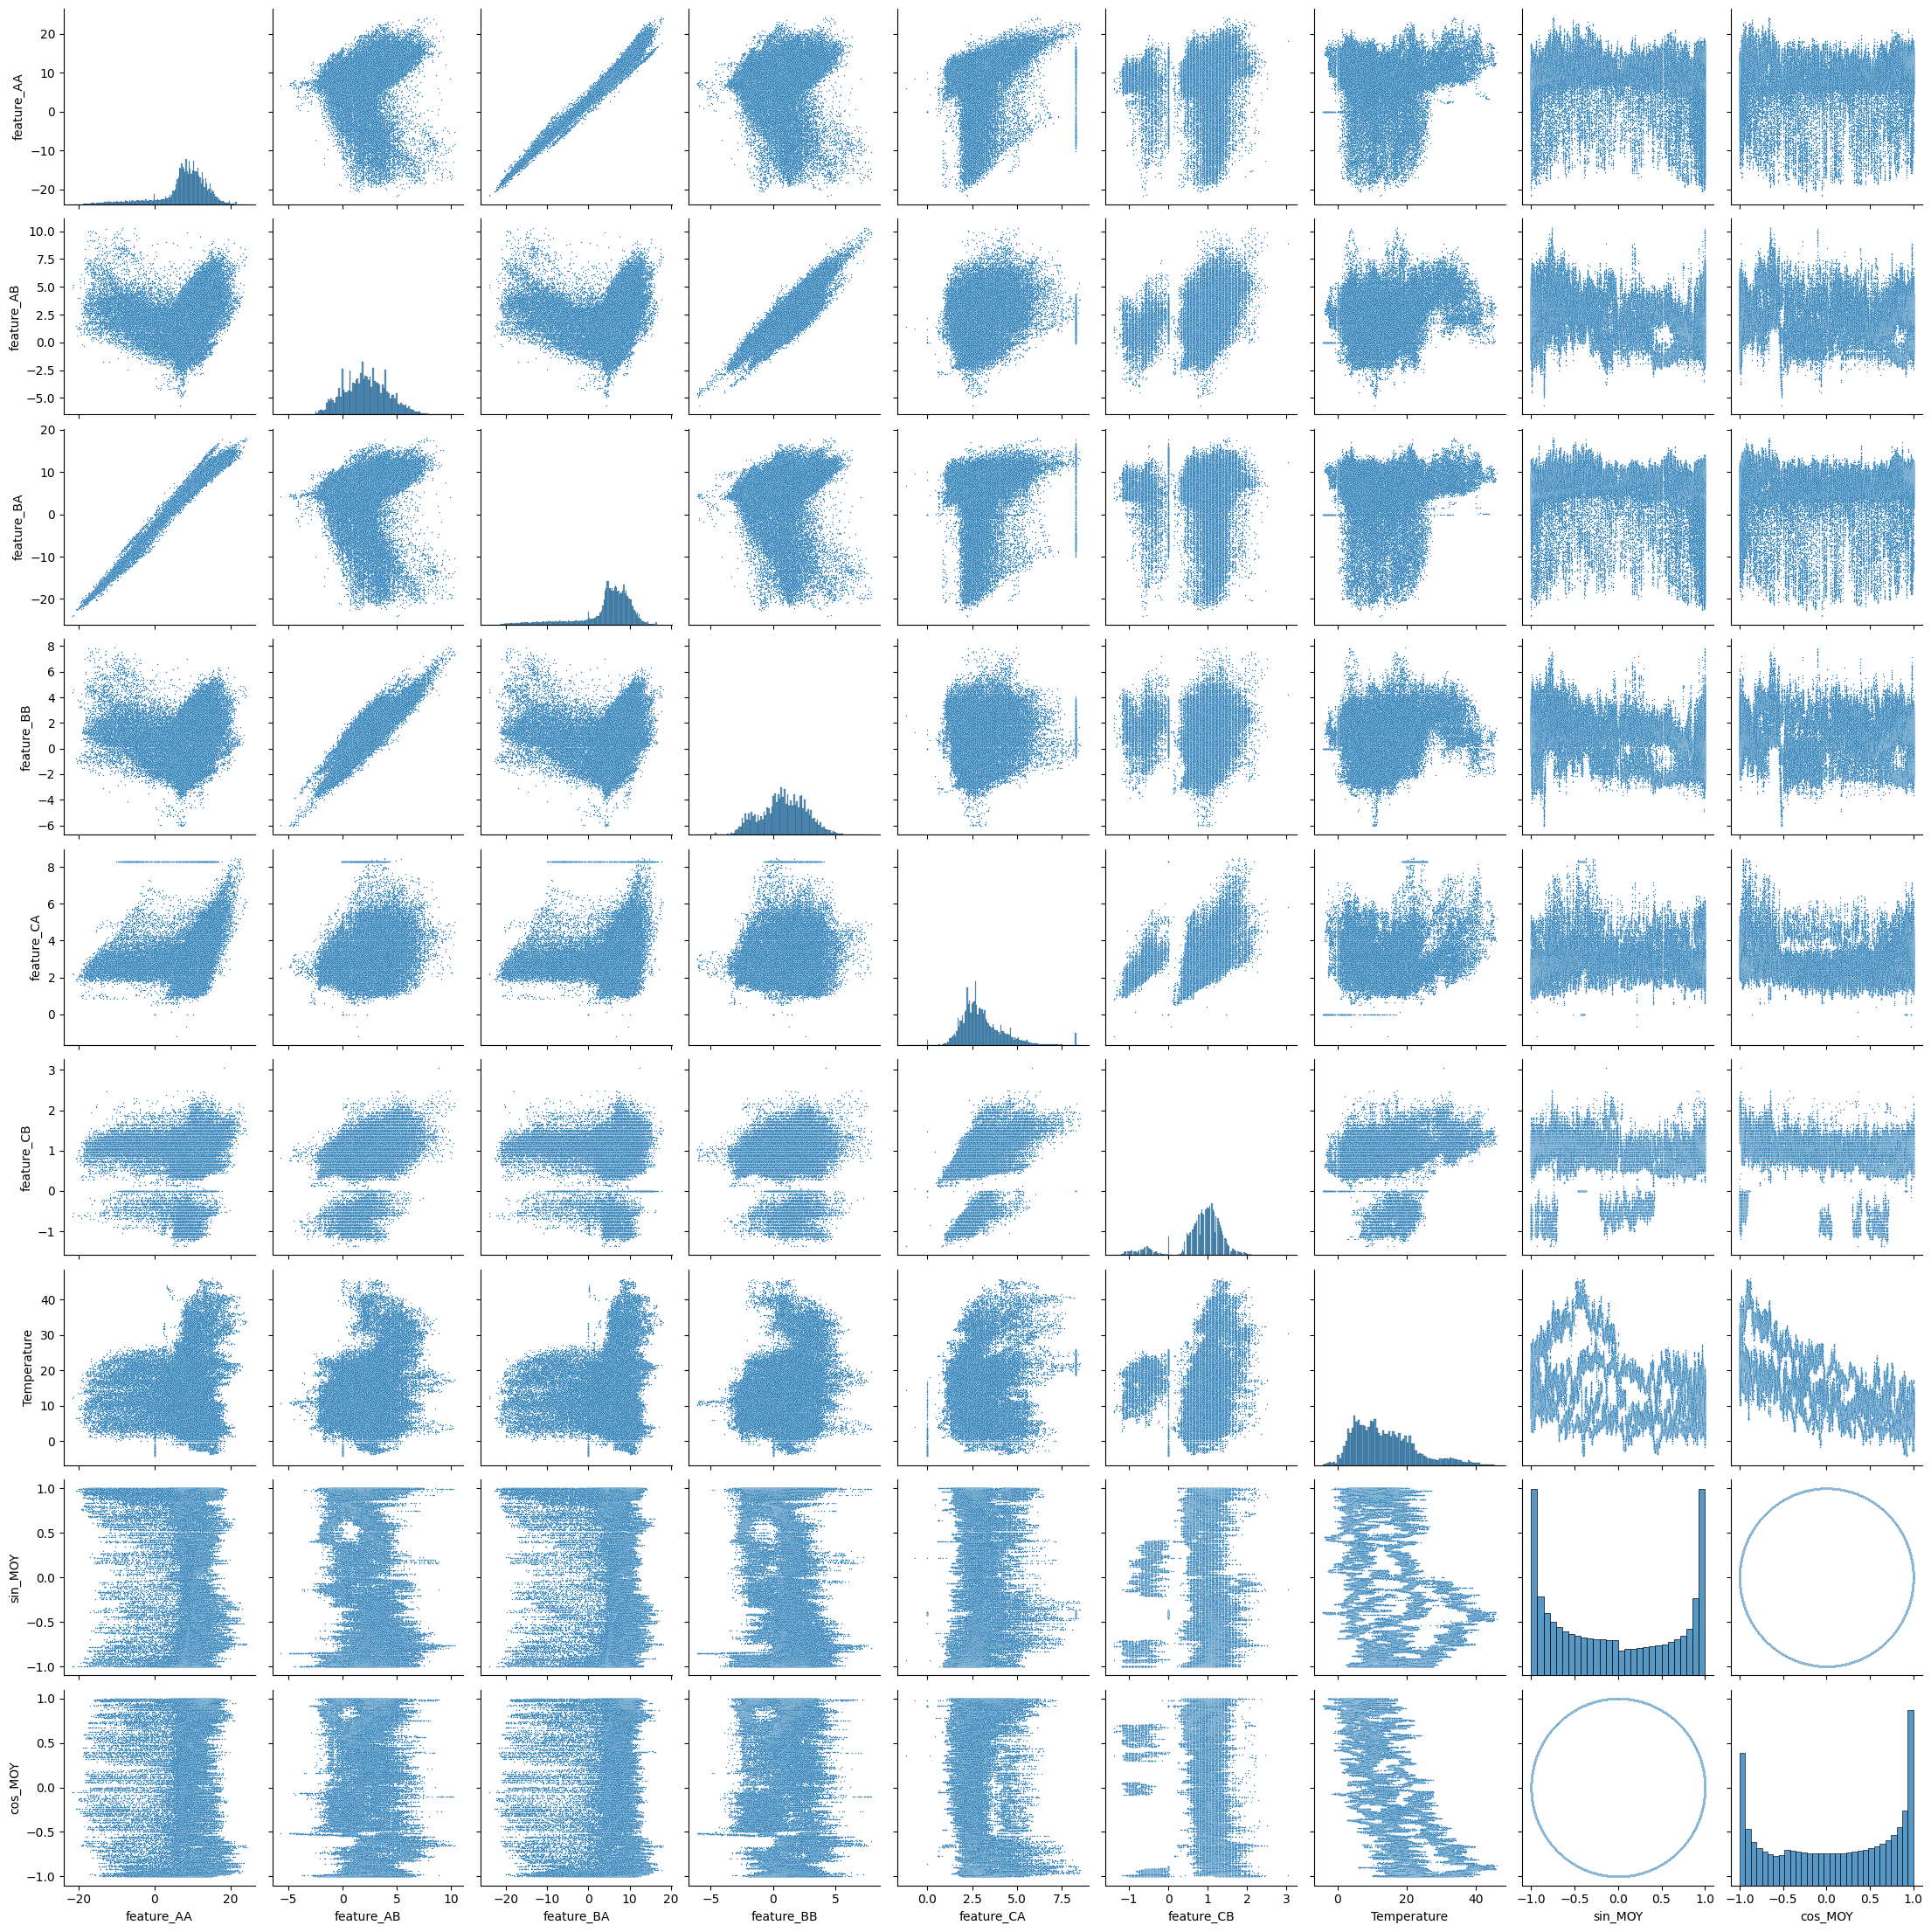

In [7]:
g = sns.pairplot(data.data.drop("id", axis="columns"), plot_kws={"s": 1})
#g.map_lower(sns.kdeplot, levels=4, color=".2") # This takes a long time 
plt.savefig("images/pairplot.png")
plt.show()

<Axes: >

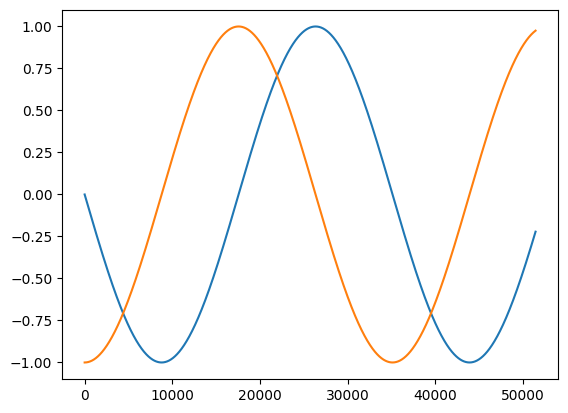

In [8]:
data.train_data.sin_MOY.plot()
data.train_data.cos_MOY.plot()


In [9]:
train_x = data.train_data.drop(["id", "date", "Temperature"], axis="columns").values
val_x = data.val_data.drop(["id", "date", "Temperature"], axis="columns").values
test_x = data.test_data.drop(["id", "date"], axis="columns").values


In [10]:
train_y = data.train_data.filter(["Temperature"], axis="columns").values[:,0]
val_y = data.val_data.filter(["Temperature"], axis="columns").values[:,0]


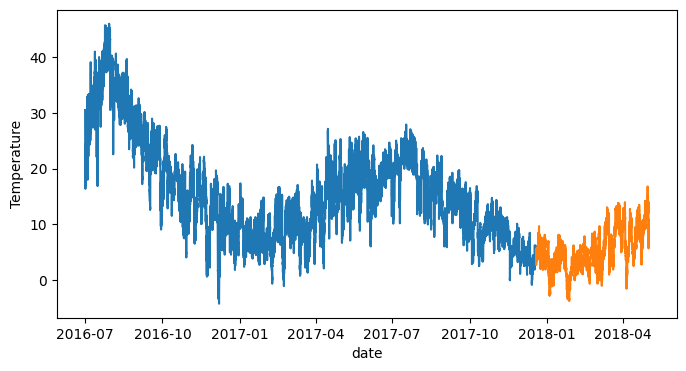

In [11]:
fig, ax = plt.subplots(1, figsize=(8,4))

sns.lineplot(x = data.train_data.date, y = data.train_data.Temperature, ax=ax)
sns.lineplot(x = data.val_data.date, y = data.val_data.Temperature, ax=ax)

# sns.scatterplot(x = val_y, y = val_y_pred, ax=ax[1], s=1)
plt.show()

In [12]:
reg = LinearRegression().fit(train_x,train_y)

In [13]:
train_y_pred = reg.predict(train_x)
val_y_pred = reg.predict(val_x)


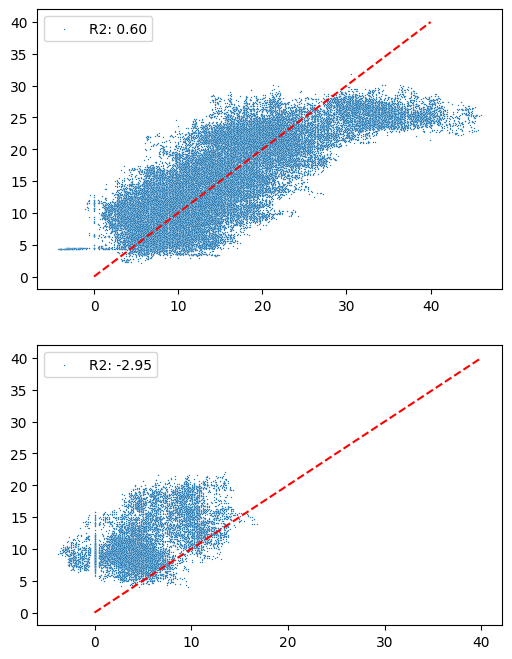

In [14]:
fig, ax = plt.subplots(2, figsize=(6,8))

sns.scatterplot(x = train_y, y = train_y_pred, ax=ax[0], s=1, label=f"R2: {r2_score(train_y, train_y_pred):.2f}")
sns.lineplot(x=[0, 40], y=[0,40], linestyle="--", color="r", ax=ax[0])
sns.scatterplot(x = val_y, y = val_y_pred, ax=ax[1], s=1, label=f"R2: {r2_score(val_y, val_y_pred):.2f}")
sns.lineplot(x=[0, 40], y=[0,40], linestyle="--", color="r", ax=ax[1])

plt.show()

In [24]:
reg = RandomForestRegressor(n_estimators=1000, max_depth = 5,random_state=0, n_jobs=-1)
reg.fit(train_x, train_y)

RandomForestRegressor(max_depth=5, n_estimators=1000, n_jobs=-1, random_state=0)

In [25]:
train_y_pred = reg.predict(train_x)
val_y_pred = reg.predict(val_x)

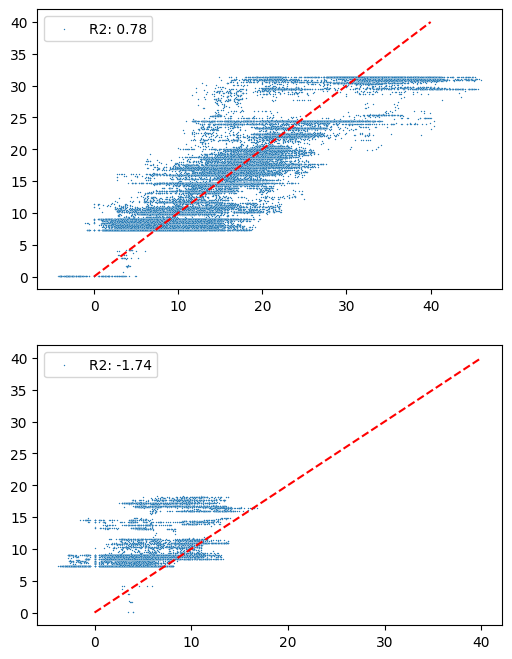

In [26]:
fig, ax = plt.subplots(2, figsize=(6,8))

sns.scatterplot(x = train_y, y = train_y_pred, ax=ax[0], s=1, label=f"R2: {r2_score(train_y, train_y_pred):.2f}")
sns.lineplot(x=[0, 40], y=[0,40], linestyle="--", color="r", ax=ax[0])
sns.scatterplot(x = val_y, y = val_y_pred, ax=ax[1], s=1, label=f"R2: {r2_score(val_y, val_y_pred):.2f}")
sns.lineplot(x=[0, 40], y=[0,40], linestyle="--", color="r", ax=ax[1])

plt.show()

In [18]:
pred_test = [est.predict(test_x) for est in reg.estimators_]

In [19]:
proba_preds = np.array(pred_test)
proba_preds.shape

(1000, 5360)

In [21]:
submission = data.generate_submission(proba_preds)

In [23]:
submission.to_csv("submission_1.csv", index=False)